# SVR - Regression model for house_rental_dataset


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [38]:
data=pd.read_excel('house_rental_data.xlsx')
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


# EDA-Visualize the data

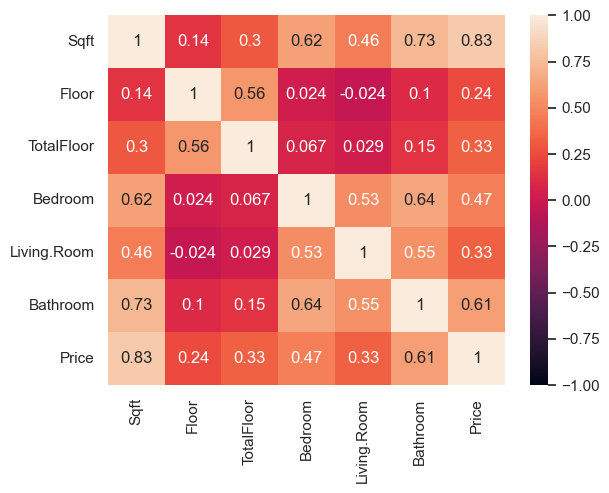

In [39]:
#plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()


array([[<Axes: title={'center': 'Sqft'}>,
        <Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'TotalFloor'}>],
       [<Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Living.Room'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

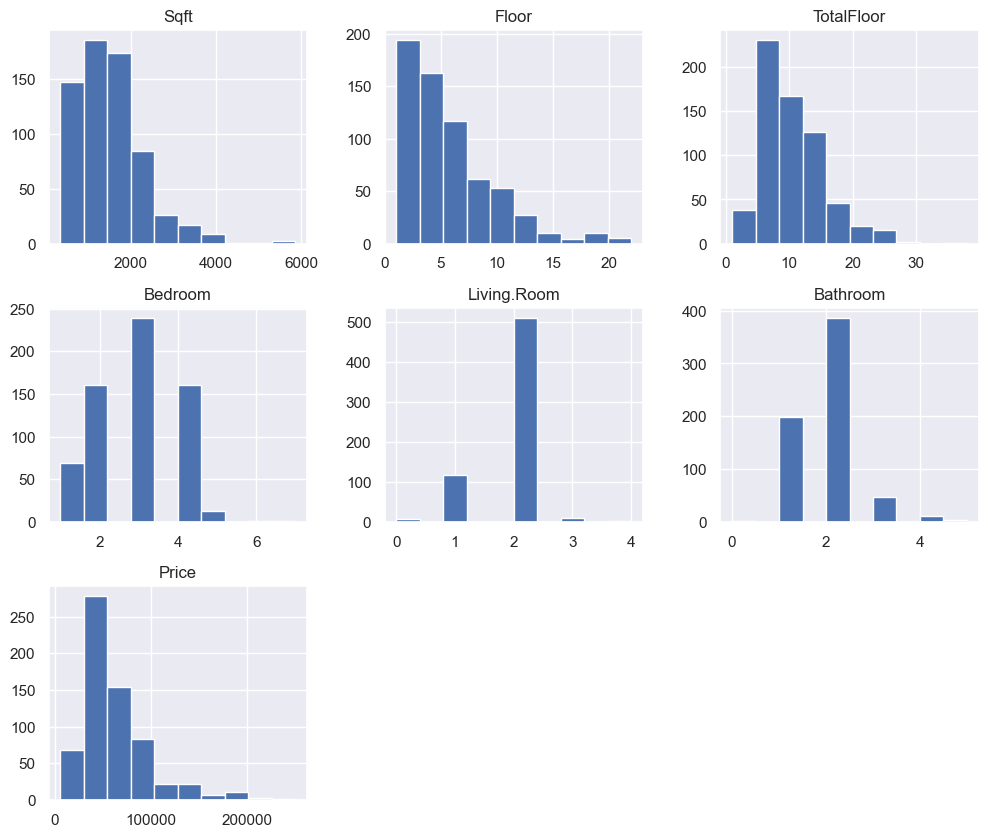

In [40]:
data.hist(figsize=(12,10))

In [41]:
data.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

<Axes: >

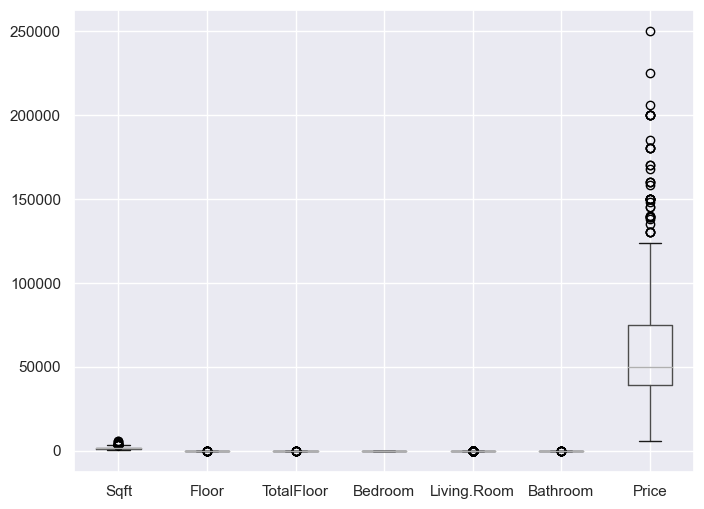

In [42]:
data.boxplot(figsize=(8,6))


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

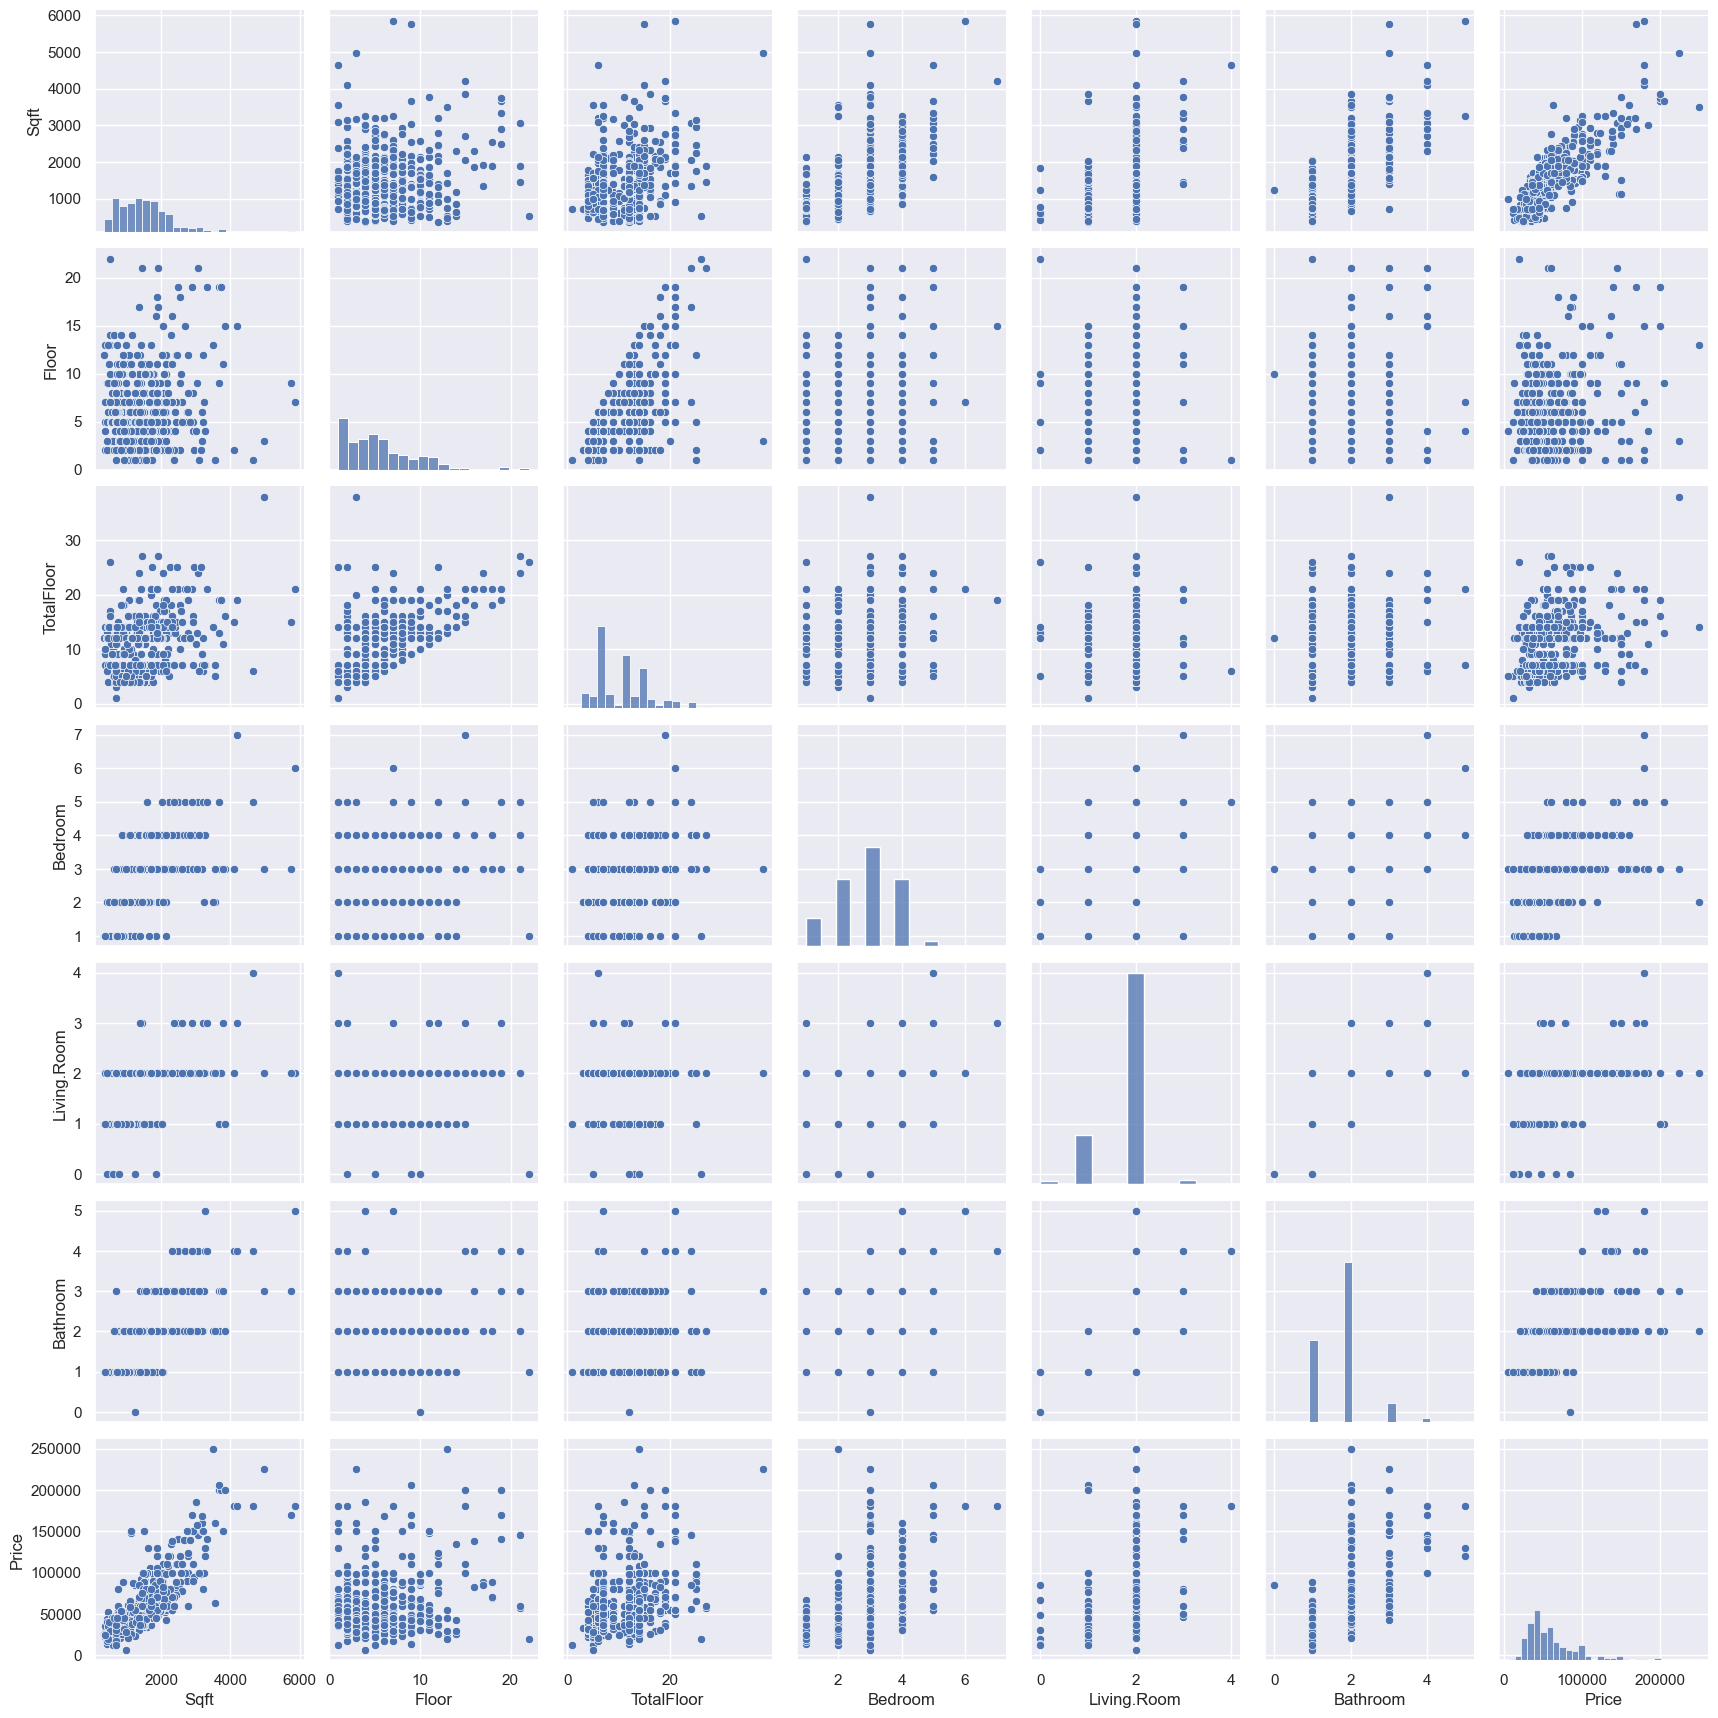

In [43]:
sns.pairplot(data)

# Assign x & y

In [45]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (645, 6)

Y shape:	 (645, 1)


# Spliting the data for training & testing

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (580, 6)

Training data-y- Shape:	 (580, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (65, 6)

Testing data(y-Outcome) Shape:	 (65, 1)


# Build the SVR regression model ,SVR with Non linear kernal - rbf

In [50]:
#SVR with Non linear kernal - rbf
support_reg=SVR()
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [49933.29241595 50023.70083514 49929.95968854 49943.05180582
 50138.37732463 49939.05165106 50095.72842317 49934.32295744
 50048.98695195 50119.72781095 50103.42775961 50041.675178
 49995.60555603 50074.42836105 50061.00484067 49983.46876259
 50105.61737886 50057.03950395 49961.33244455 50087.84766056
 50118.6125581  50023.70187214 49981.1169192  50053.03754652
 49929.5201342  49998.10864443 49923.8949448  50013.34842023
 50032.00784669 50109.11837562 50027.85469732 50132.64830943
 50008.2225629  50070.19055797 49980.6478193  50095.72852211
 49918.9739794  49942.09911831 50139.87913227 50017.4773153
 50101.9380317  49921.20780343 50136.3019483  50049.49572869
 49929.51747841 50010.77447734 49919.36685896 49921.20782629
 50074.42502845 50040.80538624 49960.92331048 49950.1930516
 

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when 

# SVR with Non linear kernal - linear

In [52]:
#SVR with Non linear kernal - linear
support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))


Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [ 31255.43490253  57097.20789718  30302.87337281  38251.19515477
  95477.47048592  35203.13755278  78378.18372523  34701.04072477
  62284.39127959  84577.77991777  77131.52860414 199410.88633148
  51175.25418959  74136.77580273  67598.45165804  47756.7577761
  80955.80547138  64116.89017932  41961.40727641  73242.26179751
 123359.19169083  58042.98335693  47822.81516507  65211.15119061
  31816.00130272  56471.89658945  26764.80508798  55183.94393491
  58523.69112018  78322.42436851  58026.10094071 114029.42820196
  57490.92033473  67182.10201523  47190.4078307   76431.26204903
  20526.92981073  37804.82174976  99058.81801771  55721.86308633
  76714.2465684   24751.06852998 112353.04404619  63033.81688347
  30579.46865279  54493.79764592  23060.22494749  23445.74998914
  69161.

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when 

# SVR with Non linear kernal - sigmoid

In [54]:
#SVR with Non linear kernal - sigmoid
support_reg=SVR(kernel='sigmoid')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [49989.99157337 49999.58352009 49987.6179503  49994.64726821
 49976.7550037  49993.04634792 49990.40481326 49990.61897396
 49997.2928099  49984.83882886 49988.85296519 49936.229773
 50000.77472804 49994.00110748 49995.86117664 50000.676405
 49988.37424332 49996.35918076 49998.93156601 49991.84596367
 49959.23069794 49999.58266471 50000.5985629  49996.83262879
 49987.25622714 50000.73597624 49981.13153066 50000.21335395
 49998.94289373 49987.58445461 49999.27768227 49964.60362767
 50000.44460876 49994.62490391 50000.58175839 49990.40656833
 49969.13742514 49994.29682529 49975.17705644 49999.98702431
 49989.16731726 49976.30474185 49966.64807068 49997.23604027
 49987.25623131 50000.33924279 49970.8813213  49976.30461437
 49994.00680223 49998.13912496 49998.87363873 49996.793503

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when 

# Support Vector Classification model

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns;
sns.set() 
from scipy import stats 
%matplotlib inline

# Linear data

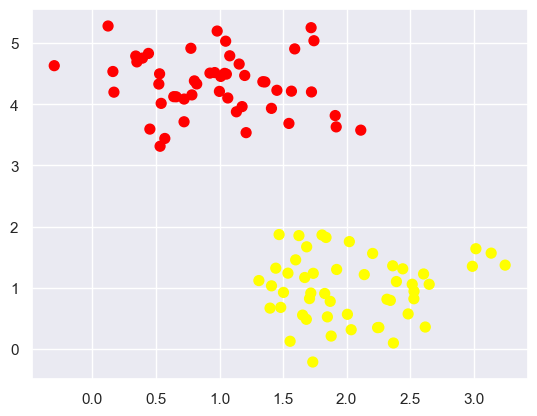

In [5]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

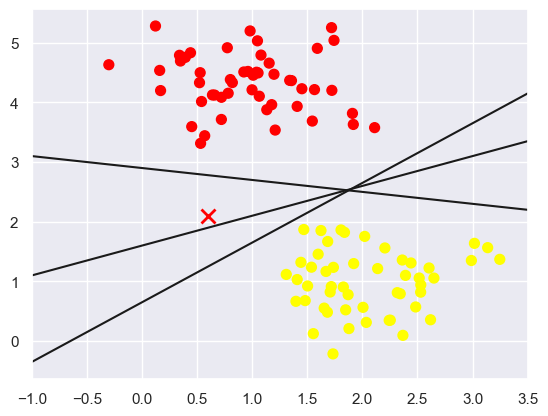

In [8]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    plt.xlim(-1,3.5)

(-1.0, 3.5)

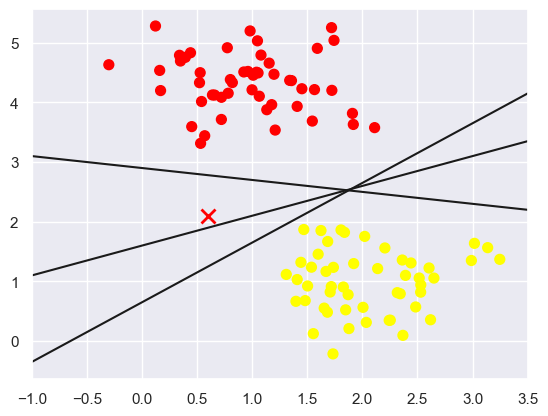

In [10]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
 plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,3.5)


# Maximizing the margin

(-1.0, 3.5)

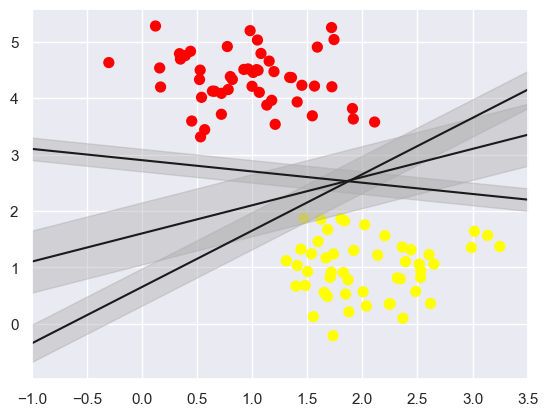

In [9]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5)

(-1.0, 3.5)

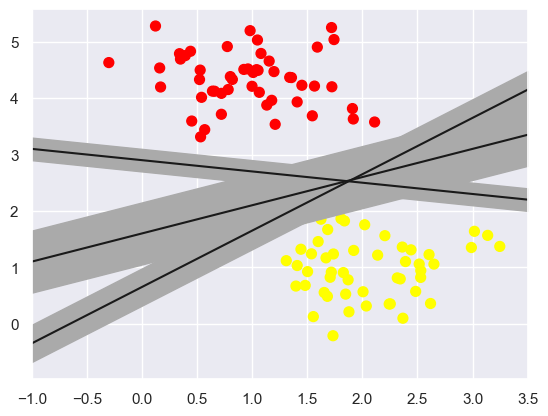

In [13]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA')
plt.xlim(-1,3.5)

# Fitting a SVM from sklearn

In [14]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

     # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

     # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])

     # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

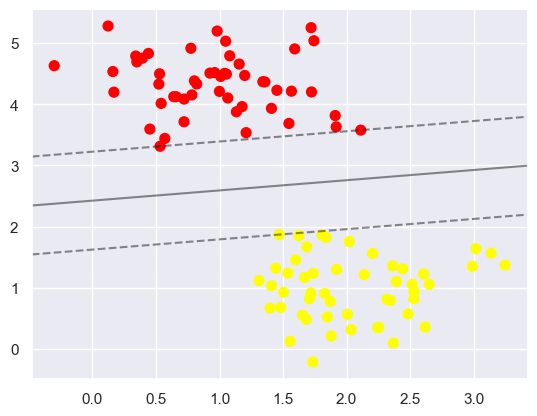

In [28]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [29]:
model.support_vectors_


array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

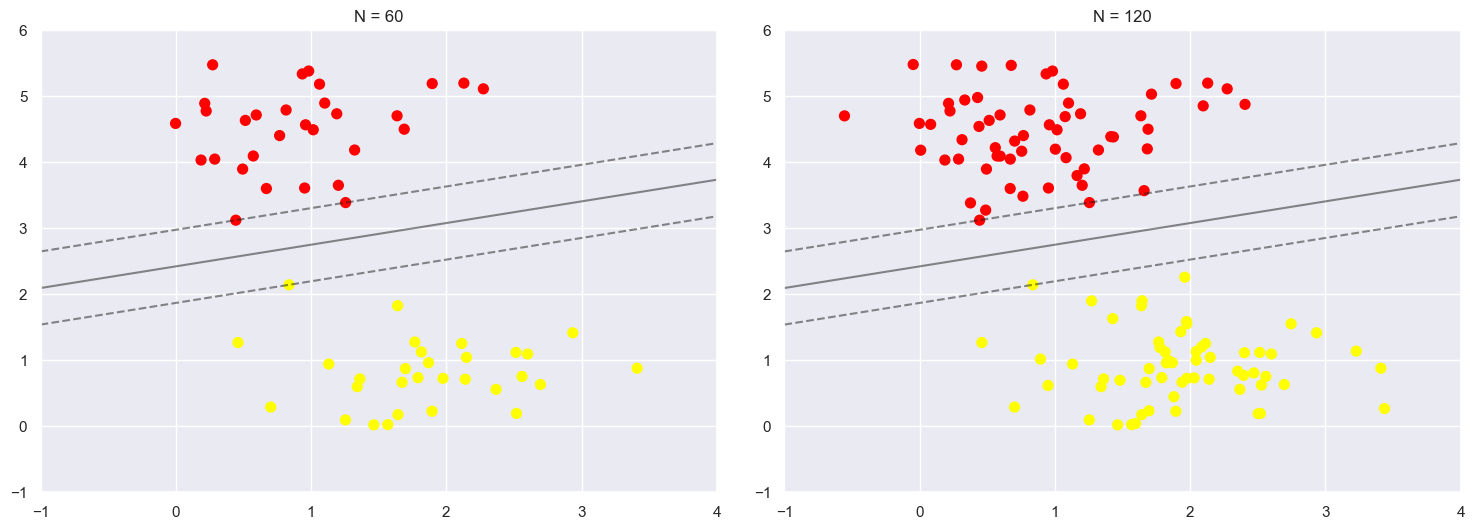

In [30]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model,ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [31]:
from ipywidgets import interact,fixed
interact(plot_svm,N=[10,100,200,400,234],ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 100, 200, 400, 234), value=10), Output()), _dom_c…

<function __main__.plot_svm(N=10, ax=None)>

# NON LINEAR 

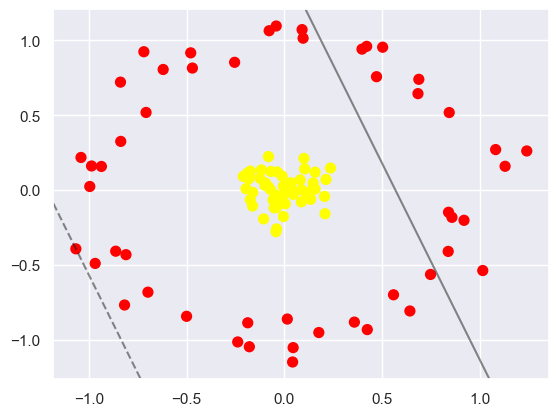

In [33]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

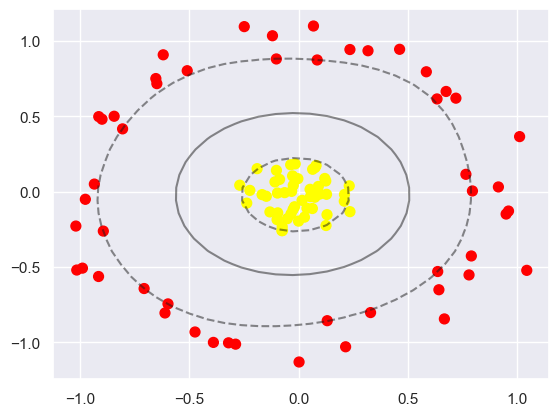

In [34]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='rbf').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

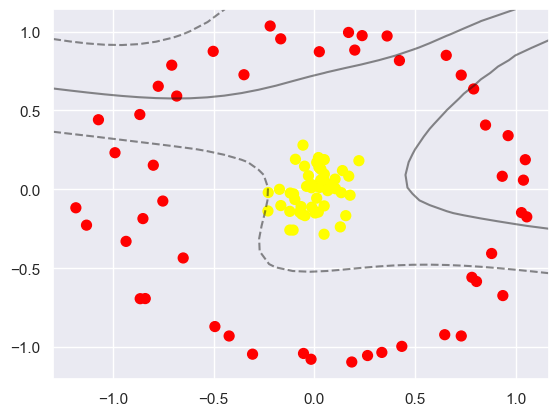

In [35]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='sigmoid').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)